# Data Cleaning

For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Let us now read the `Chicago_Crime_Detective` dataset.

In [3]:
df = pd.read_csv("Chicago_Crime_Detective.csv", index_col=0)
df.head()

/home/uranium/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [4]:
df.shape

(191641, 9)

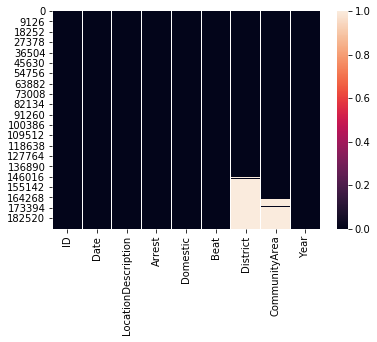

In [5]:
sns.heatmap(df.isnull())

This shows many null values for `CommunityArea` and `District` columns. Lets see the datatypes of all the columns.

In [6]:
print(df.dtypes)

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object


We shall now be doing some data cleaning. In the `District` column many redundant values are present, for example '1' and '1.0' are redundant. We shall be cleaning these two fields first.

In [7]:
df.replace(['.0',' ',],'',inplace=True)
df.fillna('unknown', inplace=True)
df

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...
191636,1310068,1/1/01 0:05,STREET,False,False,1123,unknown,unknown,2001
191637,1313404,1/1/01 0:01,STREET,False,False,2023,unknown,unknown,2001
191638,1313442,1/1/01 0:01,STREET,False,False,911,unknown,unknown,2001
191639,1563324,1/1/01 0:01,STREET,False,False,1712,unknown,unknown,2001


As we can see that both the columns are of `object` type.This is because they have many missing values. Also null values cannot be converted to integers. We shall leave these two columns untouched for now and will revisit them later.

In [8]:
df.isna().sum()

ID                     0
Date                   0
LocationDescription    0
Arrest                 0
Domestic               0
Beat                   0
District               0
CommunityArea          0
Year                   0
dtype: int64

Before continuing lets have a look at the `Date` column. We shall change its datatype to time stamp. And add columns of `Month` and `DayOfWeek`, which shall be useful in later analysis. Here the indexing will begin from 0, i.e, January will be refered by 0. Same for day of week.

In [9]:
df['Date'] = pd.to_datetime(df.Date)
df['Month'] = df.Date.dt.month
df['DayOfWeek'] = df.Date.dt.dayofweek
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,DayOfWeek
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [10]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
Month                           int64
DayOfWeek                       int64
dtype: object